# Explanatory Data Analysis

## Source
### 1. YouTube [1] and Kaggle [2]

[1] https://www.youtube.com/watch?v=xi0vhXFPegw

[2] https://www.kaggle.com/code/robikscube/introduction-to-exploratory-data-analysis/notebook

# Step 1: import and read data

```python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)


In [2]:
# read the data
df = pd.read_csv('coaster_db.csv')

# Data Understanding

> Dataaframe Shape

> head and tail

> dtypes

> describe


In [3]:
# Check the rows and columns of the dataframe
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 1087 rows and 56 columns in the dataset.


In [4]:
# Chek the dataframe rows and columns 9 top 5 rows)
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
# Check the columns
cols = list(df.columns)

In [6]:
# check the datattypes of the columns
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [7]:
# describe the dataframe
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 2: Data Preparation

> Dropping irelevant columns and rows

> Identifying duplicated columns

> renaming columns

> feature creation

In [8]:
## dropping irelavant rows and columns

# drop certain columns that we don't need
df = df[['coaster_name',
 'Location',
 'Status',
 'Manufacturer',
 'year_introduced',
 'latitude',
 'longitude',
 'Type_Main',
 'opening_date_clean',
 'speed_mph',
 'height_ft',
 'Inversions_clean',
 'Gforce_clean']].copy()

# or we can drop the columns that we want to drop via drop function
# df = df.drop(['Length', 'Opening date'], axis = 1) // axis = 1 means columns, axis = 0 means rows

# view the dataframe after dropping the columns
df

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [9]:
# check the datatypes again
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [10]:
# the column 'opening_date_clean' is in object format, we need to convert it to datetime format
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [11]:
# check the datatypes again
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [12]:
# Renaming the columns
df  = df.rename(columns={
    'coaster_name': 'Coaster_Name',
    'year_introduced': 'Year_Introduced',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'opening_date_clean': 'Opening_Date',
    'speed_mph': 'Speed_MPH',
    'height_ft': 'Height_Ft',
    'Gforce_clean': 'Gravity_Force'
}).copy() 

In [13]:
# check null data in the dataframe
df.isnull().sum()

Coaster_Name          0
Location              0
Status              213
Manufacturer         59
Year_Introduced       0
Latitude            275
Longitude           275
Type_Main             0
Opening_Date        250
Speed_MPH           150
Height_Ft           916
Inversions_clean      0
Gravity_Force       725
dtype: int64

In [14]:
# check for duplicated  data in the dataframe
df.loc[df.duplicated()]

# There are no duplicated values in the datafame

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_Ft,Inversions_clean,Gravity_Force


In [15]:
# Though there are no duplicated rows, there might be duplicated names in the dataframe
# use the 'subset' argument and pass the column name
df.loc[df.duplicated(subset = ['Coaster_Name'])].head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_Ft,Inversions_clean,Gravity_Force
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [16]:
# queey the top five rows from the column 'Coaster_name'
# lets take an example
df.query('Coaster_Name == "Crystal Beach Cyclone"')

## From the follwing output we can see that the only difference these two rows have is in their 'Year_Introduced'

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_Ft,Inversions_clean,Gravity_Force
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [17]:
## So lets check duplicacy based on the columns from same Name, location and 
## opening date (not introduced year because a roller coaster might get reintroduced more than twice)
## and this informatrion is useless

df.loc[df.duplicated(subset = ['Coaster_Name', 'Location', 'Opening_Date'])]

## take the inverse of this record and save it to a dataframe
df = df.loc[~df.duplicated(subset = ['Coaster_Name', 'Location', 'Opening_Date'])]
## We will have a dataframe with no duplicacies now


In [18]:
## There is a column named 'speed_mph' which is in US unit.
## Convert it to imperial unit
df['Speed_MPH'] = df['Speed_MPH'].apply(lambda x: x * 1.60934)
# rename the column
df = df.rename(columns={'Speed_MPH': 'Speed_KMPH'}).copy()

In [19]:
## reset the index of the column
## we will pass two arguments to the reset_index function, drop = True and inplace = True
## drop = True will drop the old index column
## inplace = True will make the changes to the dataframe itself
df.reset_index(drop = True, inplace = True)

In [20]:
## Now we are done with the cleaning part of the dataframe
## lets check the shape once
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 990 rows and 13 columns in the dataset.


# Step 3: Feature Understanding

## Univariate Analysis

### Plotting Feature Distributions
> Histograms

> KDE

> Boxplots

In [21]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_KMPH,Height_Ft,Inversions_clean,Gravity_Force
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,9.656040,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,83.685680,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,79.984198,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,117.481820,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,54.717560,NaN,0,NaN


In [22]:
## Lets check the ''value_counts' of the 'Year_Introduced' columns
## This wil give us a rough idea when and how many coasters were added
df['Year_Introduced'].value_counts()

## Results says there were 46 coaters inroduced in 1999, 45 in 2000 and so on.

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Number of Roller Coasters')

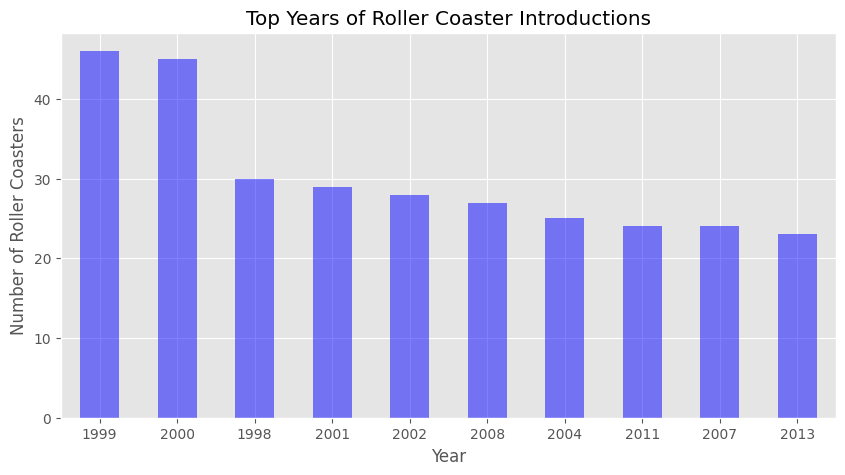

In [23]:
## create a plot to show the top 10 frequencies
# ax = axis
len = 10
ax = df['Year_Introduced'].value_counts() \
    .head(len) \
    .plot(title = "Top Years of Roller Coaster Introductions", kind = 'bar', figsize = (10, 5), color = 'blue', alpha = 0.5, rot = 0)
    #.sort_index(ascending=False) \

ax.set_xlabel("Year")
ax.set_ylabel("Number of Roller Coasters")

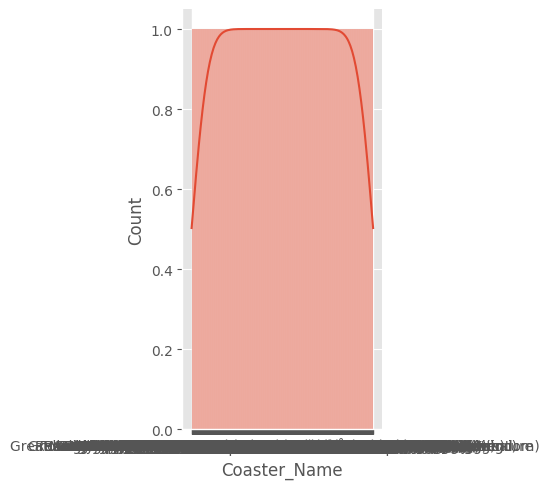

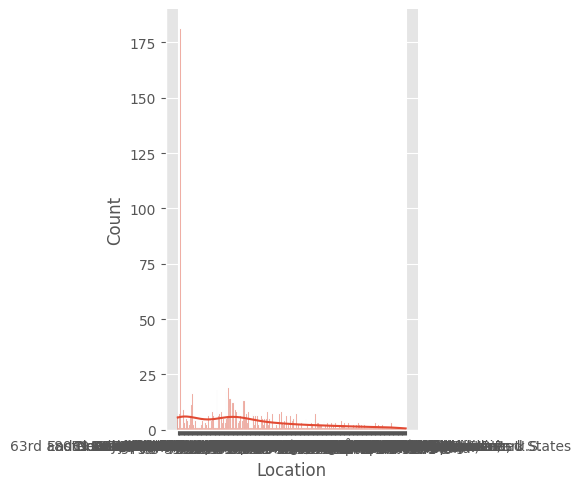

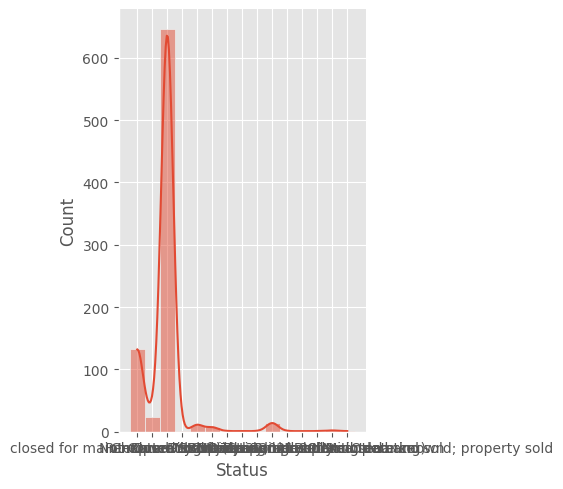

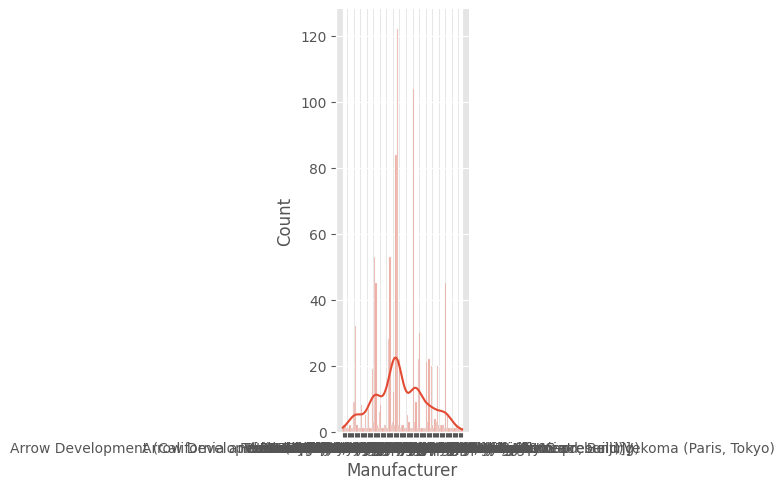

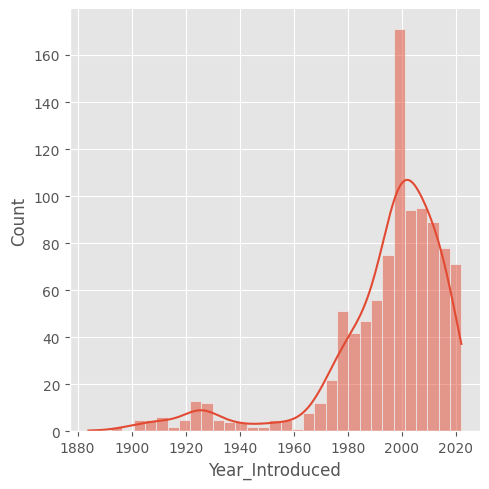

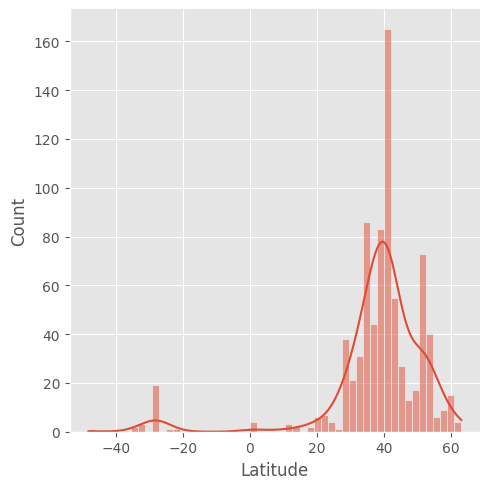

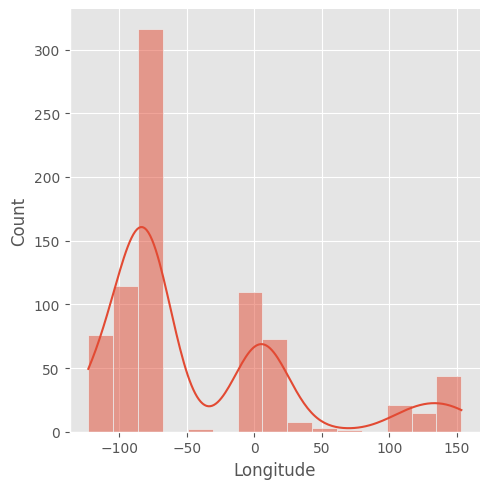

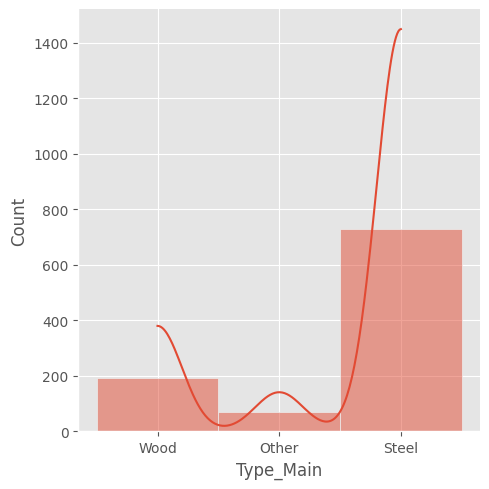

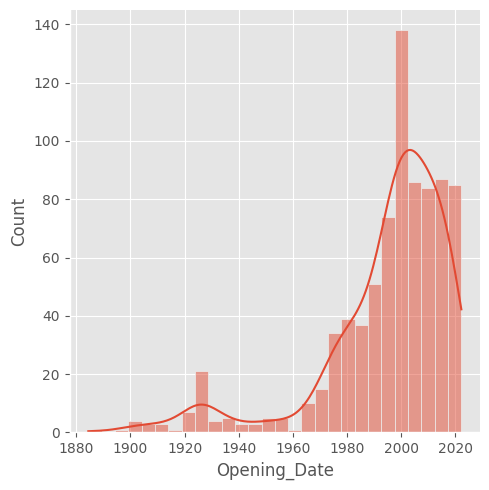

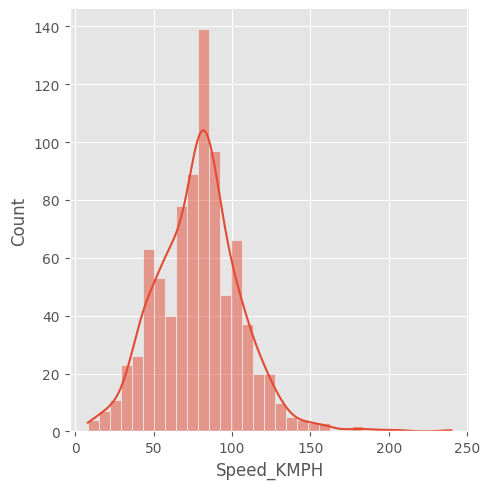

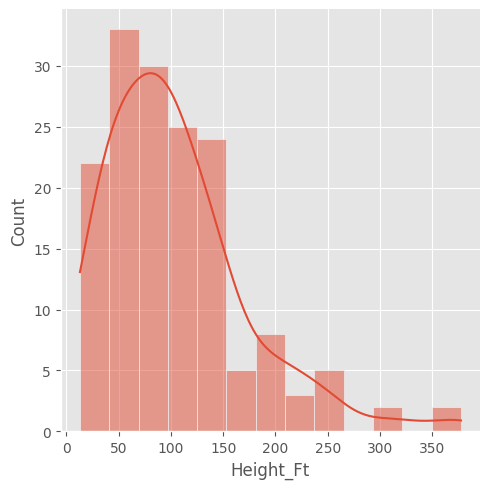

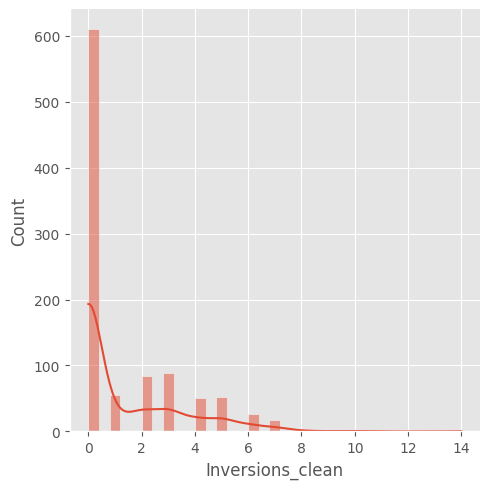

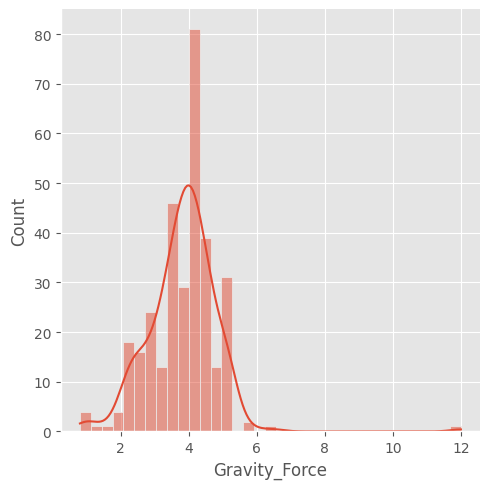

In [24]:
## Plotr the distribution of the data 
## We will use the 'distplot' function from the seaborn library
cols = list(df.columns)

## Lets plot the distribution of the 'Year_Introduced' column
for i in cols:
    sns.displot(df[i], kde = True)


# Step 4: Feture Relationships

> Scatterplot

> Heatmap Correlation

> Pairplot

> Groupby Comparison

In [25]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_KMPH,Height_Ft,Inversions_clean,Gravity_Force
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,9.656040,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,83.685680,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,79.984198,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,117.481820,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,54.717560,NaN,0,NaN


<AxesSubplot: xlabel='Speed_KMPH', ylabel='Height_Ft'>

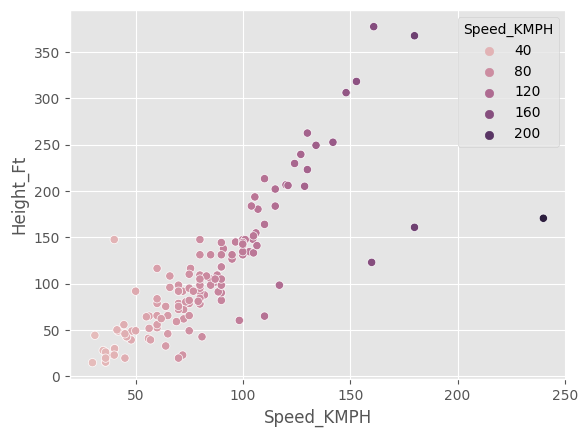

In [31]:
# Create a scatterplot
# Finds relation between two columns or features
# We will use the 'scatterplot' function from the seaborn library
sns.scatterplot(x = 'Speed_KMPH', y = 'Height_Ft', hue = 'Speed_KMPH', data = df)

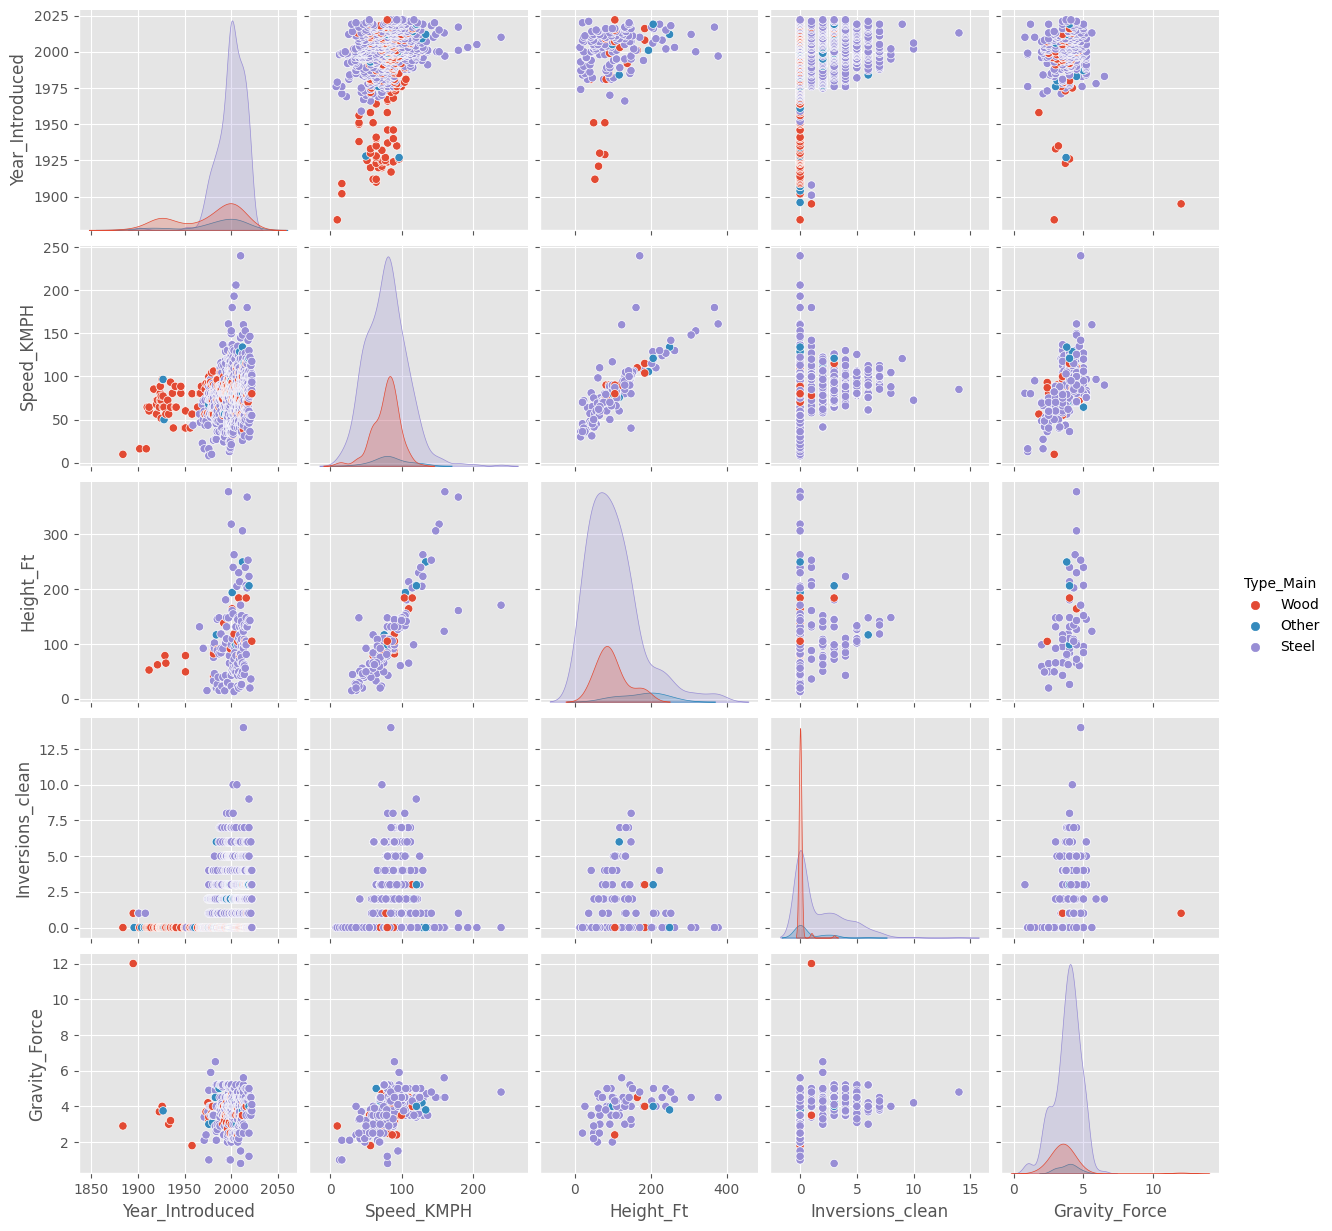

In [36]:
## creating a scatterplot with two or more features

## Lets create a scatterplot with 'Speed_KMPH' and 'Height_Ft' and 'Gravity_Force'
## we will be using pairplot function from the seaborn library
sns.pairplot(df, vars = ['Year_Introduced', 'Speed_KMPH', 'Height_Ft', 'Inversions_clean', 'Gravity_Force'], hue = 'Type_Main')

In [44]:
## Correlation between the features

## to run correlation , we first need to convert the categorical columns to numerical columns and 
## then we shall drop any null values and then run correlation

## we will be checking correlation of three columns 'Speed_KMPH', 'Height_Ft', 'Gravity_Force' and 'Year_Introduced'
## we will be using the 'corr' function from the pandas library
df_corr = df[['Year_Introduced', 'Speed_KMPH', 'Height_Ft', 'Gravity_Force']].dropna().corr()
df_corr

,Year_Introduced,Speed_KMPH,Height_Ft,Gravity_Force
Year_Introduced,1.000000,0.171978,0.135413,0.160247
Speed_KMPH,0.171978,1.000000,0.733999,0.607383
Height_Ft,0.135413,0.733999,1.000000,0.466482
Gravity_Force,0.160247,0.607383,0.466482,1.000000


<AxesSubplot: >

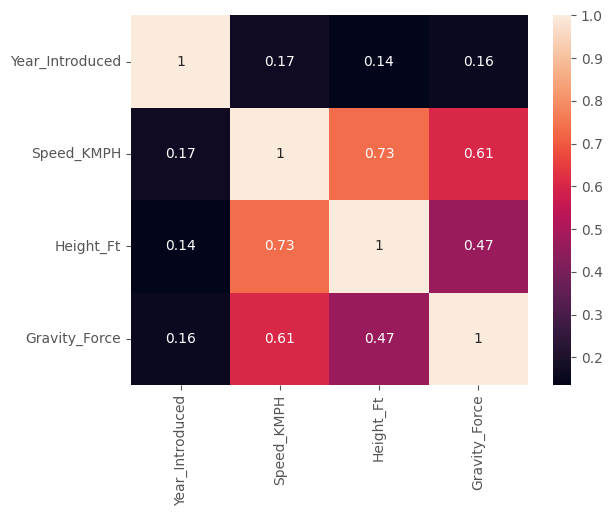

In [43]:
## Create a heatmap
## we will be using the 'heatmap' function from the seaborn library
sns.heatmap(df_corr, annot = True)

# Step 5: Ask questions about the data

> What are the locations with the fastest roller-coasters?

In [45]:
df.head(10)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_KMPH,Height_Ft,Inversions_clean,Gravity_Force
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,9.65604,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,16.09340,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1904,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
8,Drop the Dip,Coney Island,Removed,Arthur Jarvis,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1907,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN


In [63]:
df[['Location', 'Speed_KMPH']].sort_values(by='Speed_KMPH', ascending=False).head(10).dropna()

,Location,Speed_KMPH
758,Ferrari World Abu Dhabi,239.952594
648,Six Flags Great Adventure,205.995520
608,Cedar Point,193.120800
540,Fuji-Q Highland,179.924212
912,Ferrari Land,179.924212
407,Other,160.934000
409,Dreamworld,160.934000
834,Nürburgring,159.968396
525,Nagashima Spa Land,152.887300
867,Carowinds,152.887300
